In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
def f(x):
    noise = np.random.normal(0,0.3,x.shape)
    return np.sin(x) + noise

(500, 1)


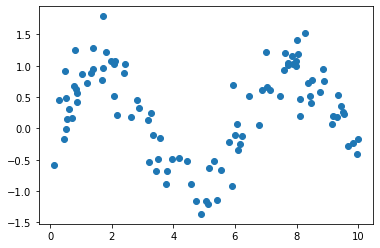

In [3]:
x = np.expand_dims(np.linspace(0, 10, 500), axis=1)
print(x.shape)
x_train, x_test = train_test_split(x, test_size=0.8)
x_train, x_test = np.sort(x_train, axis=0), np.sort(x_test, axis=0)

y_train, y_test = f(x_train).ravel(), f(x_test).ravel()
plt.scatter(x_train, y_train)


Max depth 1
mse 0.429430847372291
r2 0.17918587407600273


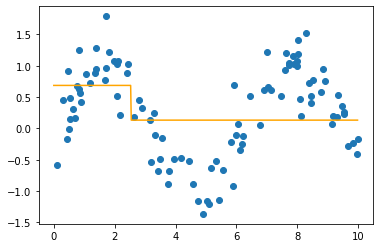

Max depth 3
mse 0.14894270496309134
r2 0.7153109122571988


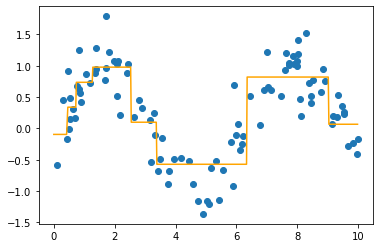

Max depth 7
mse 0.12678888967375643
r2 0.7576557150208264


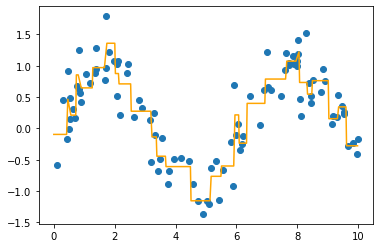

In [6]:
for depth in [1, 3, 7]:
    print('Max depth', depth)
    tree = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=3)
    tree.fit(x_train, y_train)
    predicted = tree.predict(x_test)
    print('mse',mean_squared_error(y_test, predicted))
    print('r2',r2_score(y_test, predicted))

    plt.scatter(x_train, y_train)
    plt.plot(x_test, predicted ,color='orange')
    plt.show()

In [7]:
opt_depth = -1
opt_leaf_size = -1
min_mse = 10e9
for depth in range(1, 11):
    for leaf_size in range(1, 11):
        tree = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=leaf_size)
        tree.fit(x_train, y_train)
        predicted = tree.predict(x_test)
        mse = mean_squared_error(y_test, predicted)
        print(f'Max depth {depth}, min_samples_leaf {leaf_size}, \tmse {mse}')
        if mse < min_mse:
            min_mse = mse
            opt_depth = depth
            opt_leaf_size = leaf_size

print(f'Optimal max depth {opt_depth}, optimal leaf size {opt_leaf_size}, min mse {min_mse}')

Max depth 1, min_samples_leaf 1, 	mse 0.429430847372291
Max depth 1, min_samples_leaf 2, 	mse 0.429430847372291
Max depth 1, min_samples_leaf 3, 	mse 0.429430847372291
Max depth 1, min_samples_leaf 4, 	mse 0.429430847372291
Max depth 1, min_samples_leaf 5, 	mse 0.429430847372291
Max depth 1, min_samples_leaf 6, 	mse 0.429430847372291
Max depth 1, min_samples_leaf 7, 	mse 0.429430847372291
Max depth 1, min_samples_leaf 8, 	mse 0.429430847372291
Max depth 1, min_samples_leaf 9, 	mse 0.429430847372291
Max depth 1, min_samples_leaf 10, 	mse 0.429430847372291
Max depth 2, min_samples_leaf 1, 	mse 0.22935661783799788
Max depth 2, min_samples_leaf 2, 	mse 0.22935661783799788
Max depth 2, min_samples_leaf 3, 	mse 0.22935661783799788
Max depth 2, min_samples_leaf 4, 	mse 0.22935661783799788
Max depth 2, min_samples_leaf 5, 	mse 0.22935661783799788
Max depth 2, min_samples_leaf 6, 	mse 0.22935661783799788
Max depth 2, min_samples_leaf 7, 	mse 0.22935661783799788
Max depth 2, min_samples_leaf 8, 

Estimators 1
mse 0.467934485451906
r2 0.10559001986897121


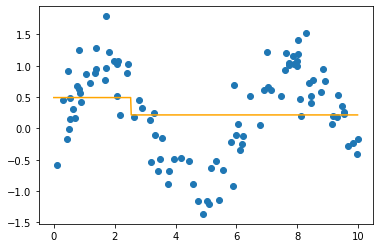

Estimators 5
mse 0.2892666319729145
r2 0.44709575677970526


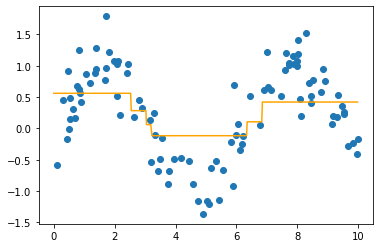

Estimators 20
mse 0.13975865943552251
r2 0.7328652969696279


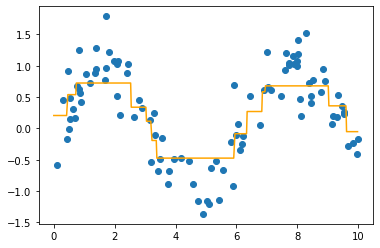

Estimators 50
mse 0.10829064381482144
r2 0.7930132623389529


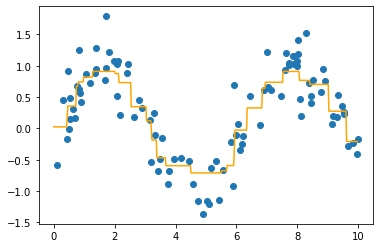

Estimators 100
mse 0.10425103498288879
r2 0.8007345707003503


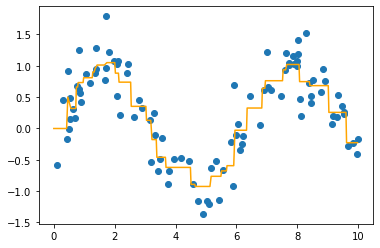

Estimators 300
mse 0.11061052201681104
r2 0.7885790471206748


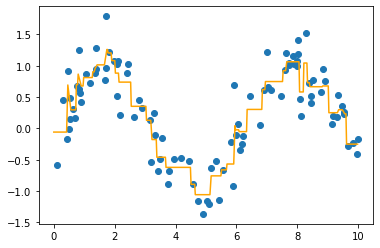

In [11]:
for n_est in [1, 5, 20, 50, 100, 300]:
    print('Estimators', n_est)
    gbr = GradientBoostingRegressor(
        max_depth=1,
        min_samples_leaf=3,
        learning_rate=0.5,
        n_estimators=n_est
    )

    gbr.fit(x_train, y_train)
    predicted = gbr.predict(x_test)
    print('mse',mean_squared_error(y_test, predicted))
    print('r2',r2_score(y_test, predicted))
    plt.scatter(x_train, y_train)
    plt.plot(x_test, predicted ,color='orange')
    plt.show()

In [10]:
opt_depth = -1
opt_leaf_size = -1
min_mse = 10e9
for depth in range(1, 11):
    for leaf_size in range(1, 11):
        gbr = GradientBoostingRegressor(
            max_depth=depth,
            min_samples_leaf=leaf_size,
            learning_rate=0.5,
            n_estimators=100
        )
        gbr.fit(x_train, y_train)
        predicted = gbr.predict(x_test)
        mse = mean_squared_error(y_test, predicted)
        print(f'Max depth {depth}, min_samples_leaf {leaf_size}, \tmse {mse}')
        
        #remember best configuration
        if mse < min_mse:
            min_mse = mse
            opt_depth = depth
            opt_leaf_size = leaf_size

print(f'Optimal max depth {opt_depth}, optimal leaf size {opt_leaf_size}, min mse {min_mse}')

Max depth 1, min_samples_leaf 1, 	mse 0.10652892514050663
Max depth 1, min_samples_leaf 2, 	mse 0.10425103498288879
Max depth 1, min_samples_leaf 3, 	mse 0.10425103498288879
Max depth 1, min_samples_leaf 4, 	mse 0.10215065139842189
Max depth 1, min_samples_leaf 5, 	mse 0.10099078867192596
Max depth 1, min_samples_leaf 6, 	mse 0.10260996939743125
Max depth 1, min_samples_leaf 7, 	mse 0.10164162859776223
Max depth 1, min_samples_leaf 8, 	mse 0.10493892086295603
Max depth 1, min_samples_leaf 9, 	mse 0.10500530469602345
Max depth 1, min_samples_leaf 10, 	mse 0.10699158396734199
Max depth 2, min_samples_leaf 1, 	mse 0.16739201617185248
Max depth 2, min_samples_leaf 2, 	mse 0.14714270345674937
Max depth 2, min_samples_leaf 3, 	mse 0.1350651789336007
Max depth 2, min_samples_leaf 4, 	mse 0.13058024553052636
Max depth 2, min_samples_leaf 5, 	mse 0.12783895990534896
Max depth 2, min_samples_leaf 6, 	mse 0.12743798534567008
Max depth 2, min_samples_leaf 7, 	mse 0.12399825501991167
Max depth 2, m